## Problem statement - We need to classify the message to either spam or not spam

**Model Flow**
1) Data cleaning
2) EDA
3) text preprocessing
4) model building
5) evaluation
6) Website

### 1) Loading Data and cleaning

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

In [2]:
sms = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


1) Data cleaning

In [4]:
sms.shape

(5572, 5)

In [5]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Dropping insignificant columns

sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
#rename columns

sms.rename(columns={'v1':'output','v2':'text'}, inplace=True)

In [9]:
sms.head()

,output,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We will use encoder in output column to convert into numeric category

In [10]:
# Encoding output column i.e. ham-0 & spam-1

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

sms['output'] = encode.fit_transform(sms['output'])

In [11]:
# checking missing values

sms.isnull().sum()

output    0
text      0
dtype: int64

In [12]:
# checking duplicates
sms.duplicated().sum()

403

In [13]:
# remove duplicates
        
sms = sms.drop_duplicates(keep='first')

In [14]:
sms.head()

,output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
sms.shape

(5169, 2)

### 2) EDA

In [16]:
sms.head()

,output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
sms['output'].value_counts()

0    4516
1     653
Name: output, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc3259b0710>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

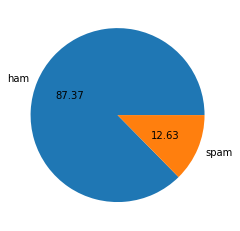

In [18]:
import matplotlib.pyplot as plt

plt.pie(sms['output'].value_counts(), labels=['ham','spam'], autopct="%0.2f")

### From above graph we can see data is very imbalanced

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/a003k/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
#We are getting all characters, words & sentences in sms/mail


sms['chracters'] = sms['text'].apply(len)

In [22]:
sms['words'] = sms['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
sms['sentence'] = sms['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
sms.head()

,output,text,chracters,words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
sms[['chracters','words', 'sentence']].describe()

,chracters,words,sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### Now we can also analyse ham(0) & spam(1) separately

In [26]:
sms[sms['output'] == 0][['chracters','words', 'sentence']].describe()

,chracters,words,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
sms[sms['output'] == 1][['chracters','words', 'sentence']].describe()

,chracters,words,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


**we see there is a huge difference in mean for ham & spam - this is basically due to imbalance in dataset. Hence assuming anything on this basis will be not right.**

In [28]:
import seaborn as sns

<AxesSubplot:xlabel='chracters', ylabel='Count'>

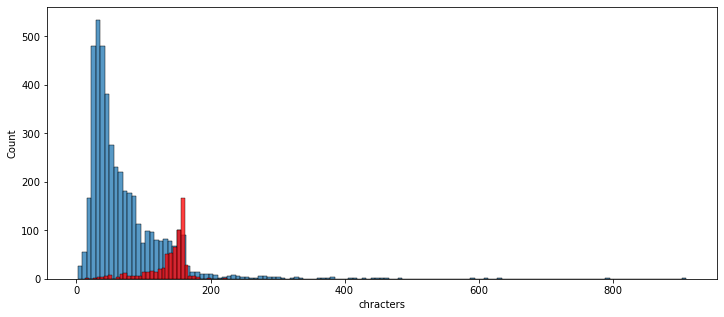

In [29]:
plt.figure(figsize=(12,5))
sns.histplot(sms[sms['output'] == 0]['chracters'])
sns.histplot(sms[sms['output'] == 1]['chracters'], color='red')

<AxesSubplot:xlabel='words', ylabel='Count'>

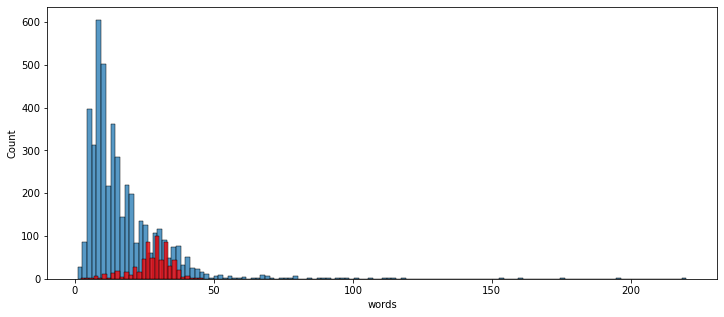

In [30]:
plt.figure(figsize=(12,5))
sns.histplot(sms[sms['output'] == 0]['words'])
sns.histplot(sms[sms['output'] == 1]['words'], color='red')

<AxesSubplot:xlabel='sentence', ylabel='Count'>

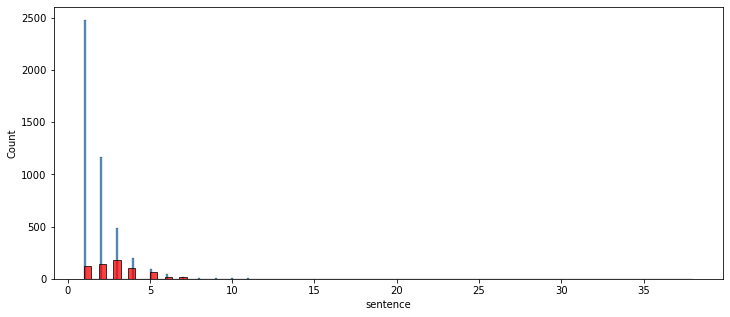

In [31]:
plt.figure(figsize=(12,5))
sns.histplot(sms[sms['output'] == 0]['sentence'])
sns.histplot(sms[sms['output'] == 1]['sentence'], color='red')

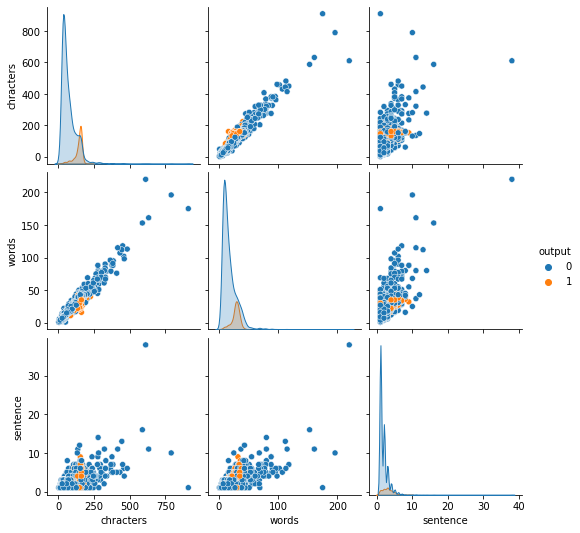

In [32]:
sns.pairplot(sms, hue='output')

<AxesSubplot:>

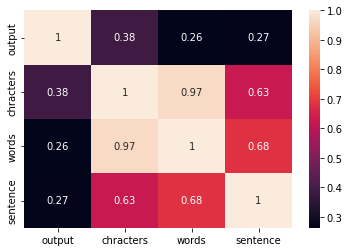

In [33]:
# correlation coeff

sns.heatmap(sms.corr(), annot=True)

from above we can see ouput more related to characters or can say have more effect.

### 3) Data Preprocessing
    - Lower case,
    - Tokenization,
    - Removing special characters,
    - Removing stop words & punctuation,
    - Stemming

In [34]:
# Stopwords are commonly used words which have no contextual meaning in an sentence. Hence will be removing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/a003k/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
# we will apply stemming which will convert all similar words into one word.eg love,loves,loving,loved...

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [37]:
# Function to perform preprocessing

def processing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)# list of words 
    
    y =[]
    for i in text:
        if i.isalnum():# alpha numeric (removing special characters)
            y.append(i)
            
    #text = y       We never copy list this way since list is the mutable
                   #datatype hence we need to do cloning
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text  = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y) 

In [38]:
sms['transformed_text'] = sms['text'].apply(processing)

In [39]:
sms.head()

,output,text,chracters,words,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Token Visualization
***We are going to use wordcloud. It will increase the font of most important words***

In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,min_font_size=10,background_color='white')

In [41]:
spam_wc = wc.generate(sms[sms['output'] == 1]['transformed_text'].str.cat(sep=""))

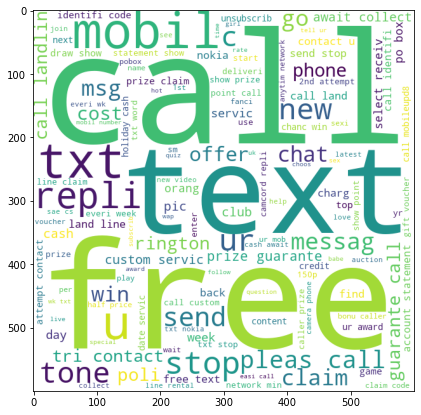

In [42]:
plt.figure(figsize=(12,7))
plt.imshow(spam_wc)

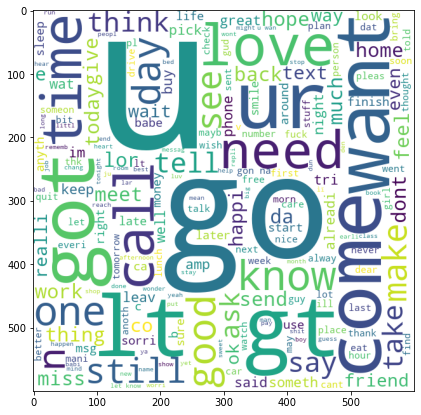

In [43]:
ham_wc = wc.generate(sms[sms['output'] == 0]['transformed_text'].str.cat(sep=""))
plt.figure(figsize=(12,7))
plt.imshow(ham_wc)

In [44]:
sms.head()

,output,text,chracters,words,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
spam_corpus =[]
for i in sms[sms['output'] == 1]['transformed_text'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

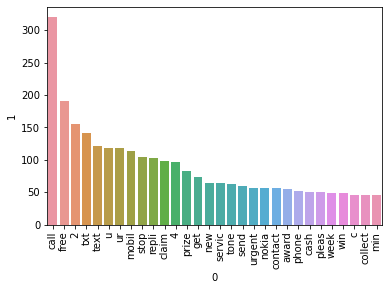

In [47]:
# Plotting most common 30 words for both ham & spam

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
ham_corpus =[]
for i in sms[sms['output'] == 0]['transformed_text'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [49]:
len(ham_corpus)

35402

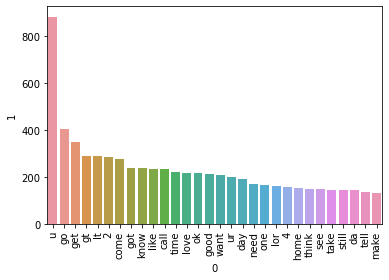

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4) Model Building:-

In [51]:
# converting text to number/vectors using 1) bags of word 2) tfidf 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv =CountVectorizer()
tfidf = TfidfVectorizer()

In [52]:
x =tfidf.fit_transform(sms['transformed_text']).toarray()


In [53]:
x.shape

(5169, 6708)

In [54]:
y = sms['output'].values

In [55]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

gb = GaussianNB()
bg = BernoulliNB()
mg = MultinomialNB()



In [57]:
gb.fit(train_X,train_y)
y_pred = gb.predict(test_X)
print(accuracy_score(test_y,y_pred))
print(precision_score(test_y,y_pred))
print(confusion_matrix(test_y,y_pred))


0.8762088974854932
0.5231481481481481
[[793 103]
 [ 25 113]]


In [58]:
bg.fit(train_X,train_y)
y_pred = bg.predict(test_X)
print(accuracy_score(test_y,y_pred))
print(precision_score(test_y,y_pred))
print(confusion_matrix(test_y,y_pred))


0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [59]:
mg.fit(train_X,train_y)
y_pred = mg.predict(test_X)
print(accuracy_score(test_y,y_pred))
print(precision_score(test_y,y_pred))
print(confusion_matrix(test_y,y_pred))


0.9593810444874274
1.0
[[896   0]
 [ 42  96]]


### Tfidf & using Multinomial giving best results but will be checking on other algorithms and choose the best

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
svc = SVC(kernel='sigmoid', gamma=0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dt = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression(solver='liblinear')
rf = RandomForestClassifier(n_estimators=50 , random_state=2)
ab = AdaBoostClassifier(n_estimators=50, random_state=2)
b = BaggingClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [62]:
clf = {
    'svm' : svc,
    'KNC' : knc,
    'mnnb' : mnb,
    'DT' : dt,
    'LR': lr,
    'RF' : rf,
    'AB' : ab,
    'B' : b,
    'GB' : gb,
    
}

In [63]:

def model(cf,train_X,test_X,train_y,test_y):
    cf.fit(train_X,train_y)
    y_pred = cf.predict(test_X)
    acc = accuracy_score(test_y,y_pred)
    pre = precision_score(test_y,y_pred)
        
    return acc,pre
    

In [64]:
model(svc,train_X,test_X,train_y,test_y)

(0.9110251450676983, 0.9791666666666666)

In [65]:
acc_score=[]
pre_score=[]

for name,cf in clf.items():
    
    a,p = model(cf,train_X,test_X,train_y,test_y)
  
    acc_score.append(a)
    pre_score.append(p)

In [66]:
pef_df = pd.DataFrame({'Algorithms':clf.keys(),'Accuracy':acc_score,'Precision':pre_score}).sort_values('Precision',ascending=False)

In [67]:
pef_df

,Algorithms,Accuracy,Precision
1,KNC,0.900387,1.000000
2,mnnb,0.959381,1.000000
5,RF,0.971954,1.000000
4,LR,0.947776,0.988372
0,svm,0.911025,0.979167
6,AB,0.961315,0.945455
8,GB,0.952611,0.923810
7,B,0.958414,0.862595
3,DT,0.936170,0.846154


In case text we always consider( no rule ) Precision value above accuracy.
Therefore Since random forest is having highest Precision as well as accuracy we will
consider that as our final model


In [68]:
import pickle

pickle.dump(tfidf,open('new_vec.pkl','wb'))
pickle.dump(rf,open('RandomForest.pkl','wb'))